<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Causal Inference In Statistics - A Primer</h1>
        <h1>3.3 Backdoor Criterion</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
    <div style="float: right; margin-right:10px;"> <p><a href="https://amzn.to/3gsFlkO" target=_blank><img src='data/causality.jpeg' width='100px'>
        <!--Amazon Affiliate Link--></a></p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

from CausalModel import CausalModel

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.2.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Git hash: f7b1abb57541776dc786174deb102ca4ab864df6

numpy     : 2.2.4
watermark : 2.5.0
pandas    : 2.2.3
matplotlib: 3.10.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
G = CausalModel()
G.add_causation('X', 'Y')
G.add_causation('W', 'Y')
G.add_causation('Z', 'X')
G.add_causation('Z', 'W')

G.pos = {'Z': (0, 1), 'X':(0,0), 'Y':(1, 0), 'W':(1, 1)}

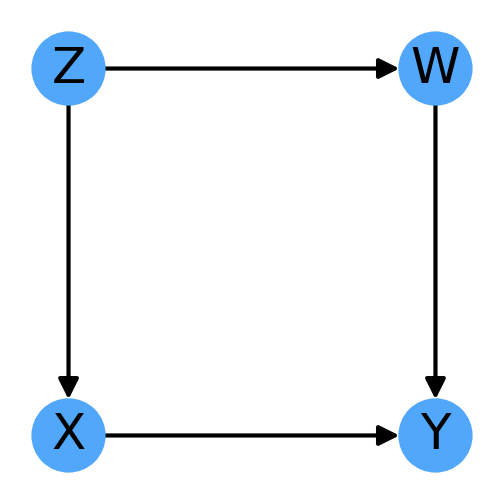

In [5]:
fig, ax = plt.subplots(1, figsize=(2.2, 2.2))
G.plot(ax=ax)

In [6]:
G.save_model('dags/Primer.Fig.3.6.dot')

In [7]:
G = CausalModel('dags/Primer.Fig.2.8.dot')

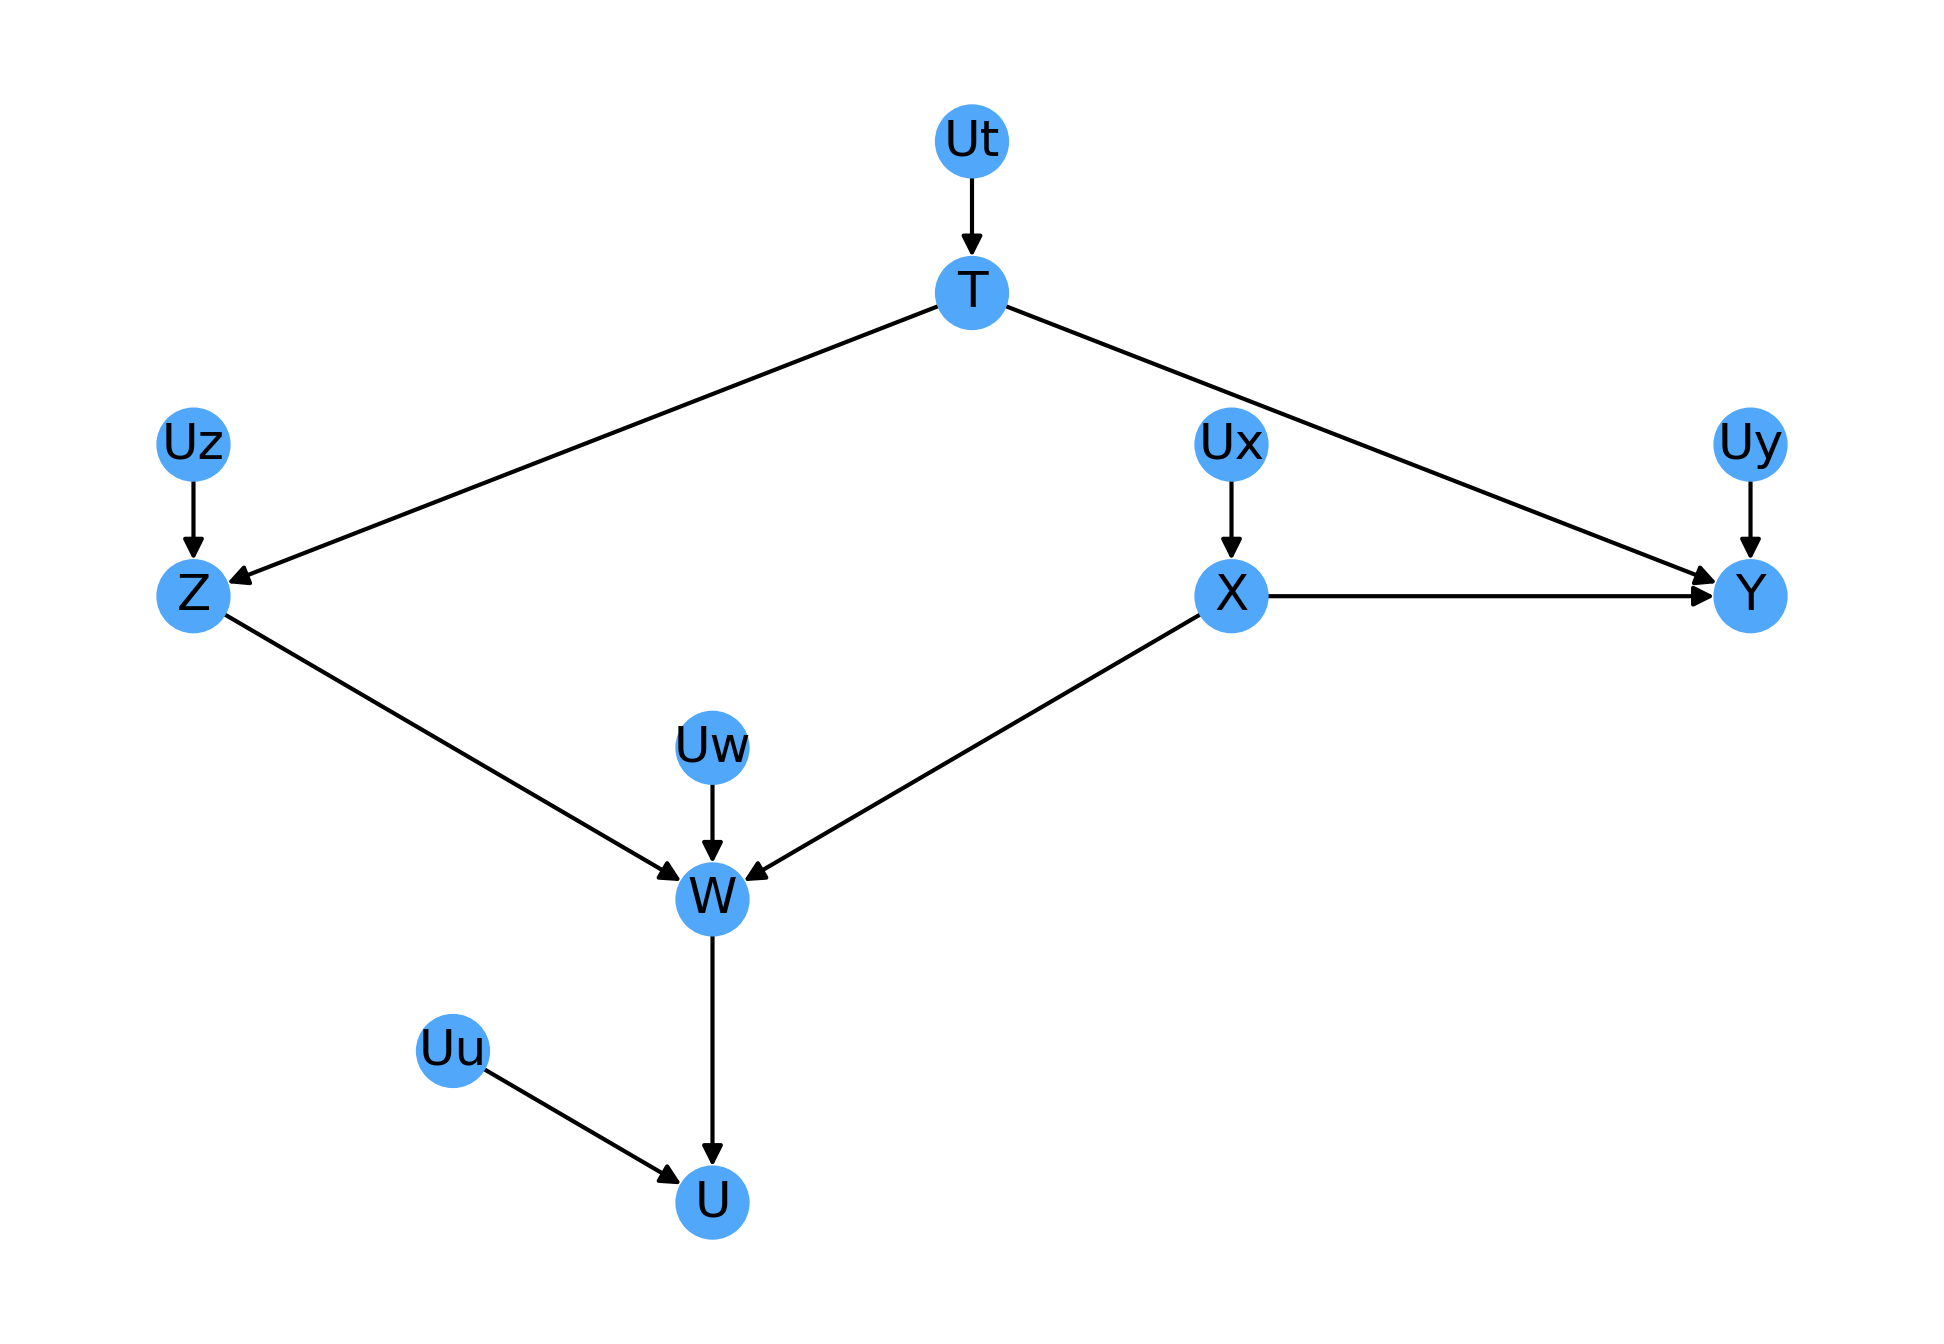

In [8]:
fig, ax = plt.subplots(1, figsize=(7, 5))
G.plot(ax=ax)

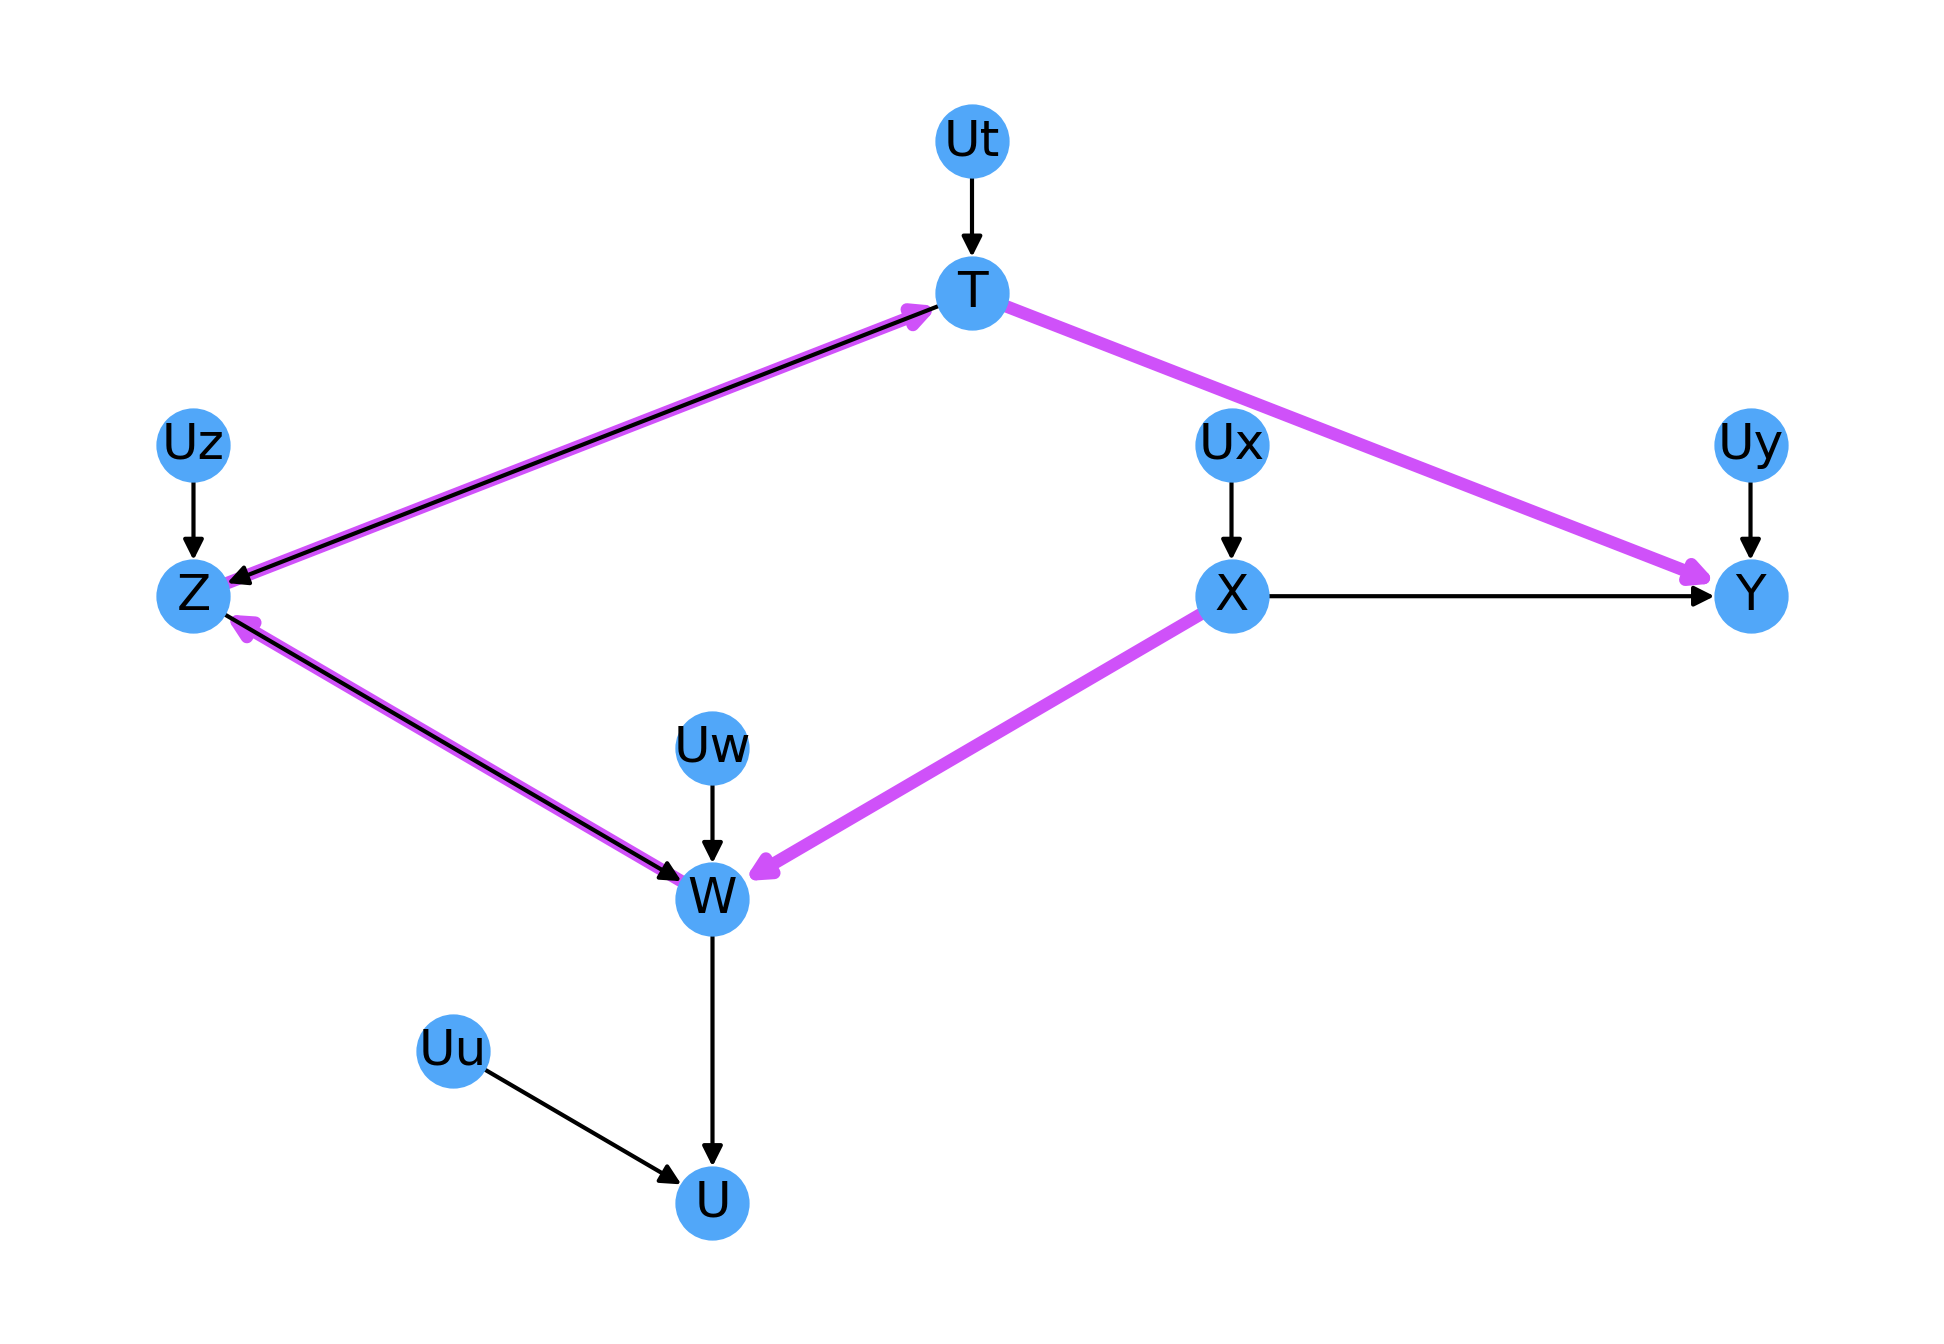

In [9]:
fig, ax = plt.subplots(1, figsize=(7, 5))
G.plot_path(['X', 'W', 'Z', 'T', 'Y'], ax=ax)

In [10]:
G = CausalModel()
G.add_causation('E', 'Z')
G.add_causation('E', 'X')
G.add_causation('A', 'Z')
G.add_causation('A', 'Y')
G.add_causation('Z', 'X')
G.add_causation('Z', 'Y')
G.add_causation('X', 'Y')

G.pos = {'E':(-1, 2), 'X':(0, 0), 'Z':(1, 1), 'Y':(2, 0), 'A':(3, 2)}

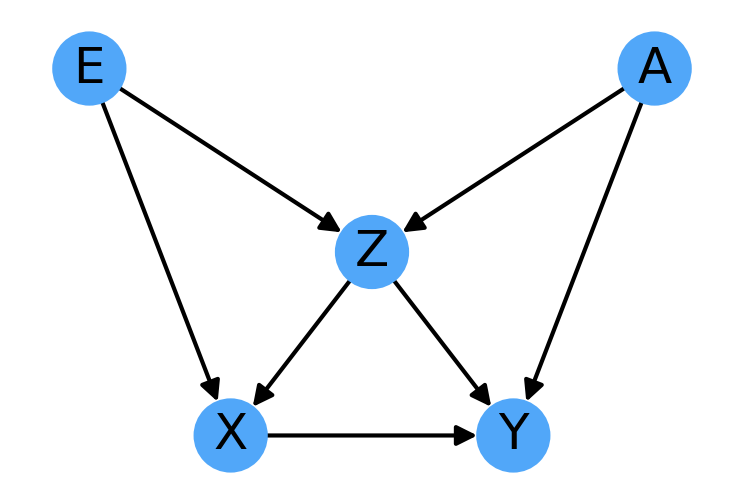

In [11]:
fig, ax= plt.subplots(1, figsize=(3,2.2))
G.plot(ax=ax)

In [12]:
G.save_model('dags/Primer.Fig.3.7.dot')

In [13]:
G = CausalModel()
G.add_causation('B', 'A')
G.add_causation('B', 'Z')
G.add_causation('C', 'Z')
G.add_causation('C', 'D')
G.add_causation('A', 'X')
G.add_causation('X', 'W')
G.add_causation('W', 'Y')
G.add_causation('D', 'Y')
G.add_causation('Z', 'X')
G.add_causation('Z', 'Y')

G.pos = {'B': (-1, 1),              'C': (1, 1),
         'A': (-1, 0), 'Z': (0, 0), 'D': (1, 0),
         'X': (-1, -1), 'W': (0, -1), 'Y': (1, -1),}

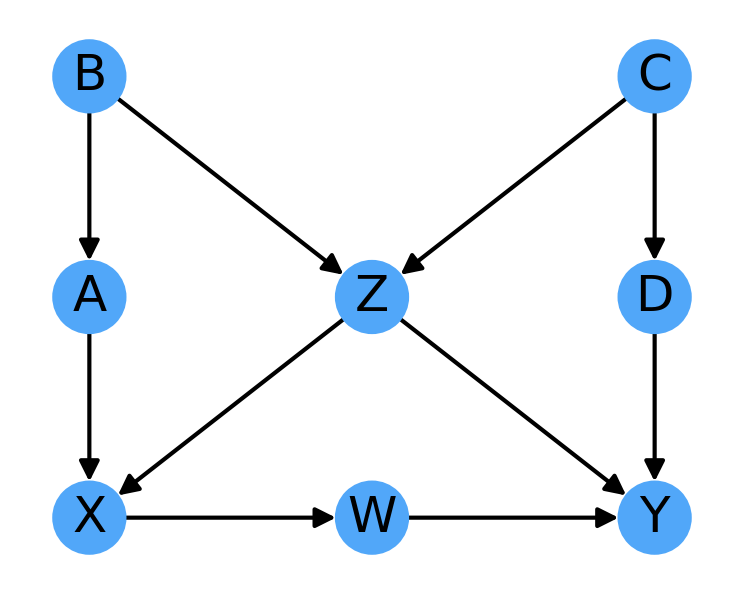

In [14]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G.plot(ax=ax)

In [15]:
G.save_model('dags/Primer.Fig.3.8.dot')

## Back-Door Criterion

Back-Door Criterion - A a set of variables Z satisfies the backdoor criterion relative to (X, Y) if:
- no node in Z is a descendant of X, 
- Z blocks every path between X and Y that contains an arrow into X

All backdoor paths go through Z

In [16]:
paths = G.all_paths('X', 'Y')

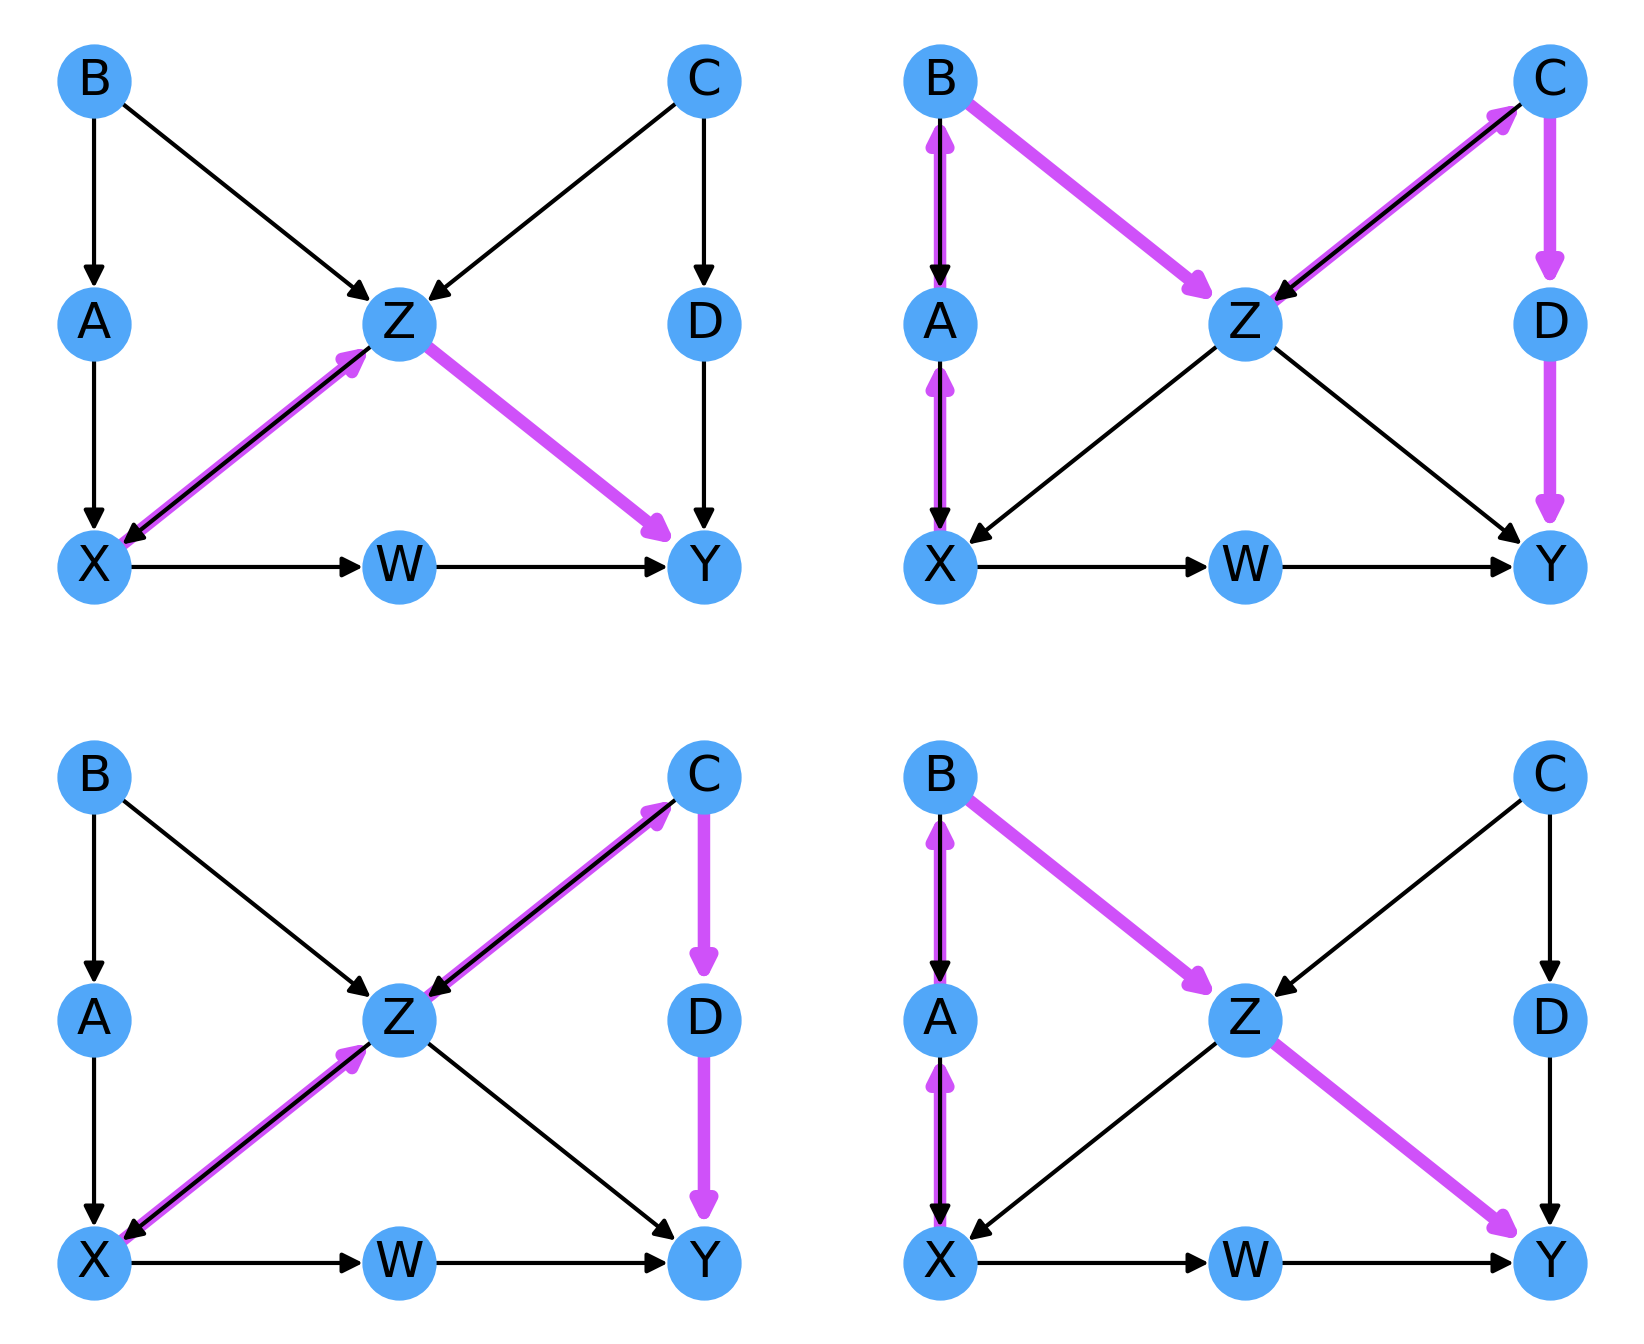

In [17]:
fig, ax_lst = plt.subplots(2, 2, figsize=(6, 5))
ax_lst = np.array(ax_lst).flatten()

pos = 0
for i, path in enumerate(paths):
    if 'W' in path: # skip the direct path
        continue
    G.plot_path(path, ax=ax_lst[pos])
    pos += 1

ax_lst[-1].axis('off');

So we must condition on Z. Since Z is a collider we have to also condition on one of it's input (or their descendants), so one of (A, B, C, or D). Z in addition to any of these 4 nodes will fulfill the back-door criteria. 

The pair ('A', 'Z') being the set of parents of X is an obvious choice.

In [18]:
G.parents('X')

['A', 'Z']

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>